In [1]:
!pip install autogluon.multimodal

In [2]:
!pip uninstall -y torchaudio
!pip install torchaudio

Found existing installation: torchaudio 2.4.1
Uninstalling torchaudio-2.4.1:
  Successfully uninstalled torchaudio-2.4.1
  Using cached torchaudio-2.4.1-cp310-cp310-manylinux1_x86_64.whl.metadata (6.4 kB)
  Using cached torch-2.4.1-cp310-cp310-manylinux1_x86_64.whl.metadata (26 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached triton-3.0.0-1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.3 kB)
Using cached torchaudio-2.4.1-cp310-cp310-manylinux1_x86_64.whl (3.4 MB)
Using cached torch-2.4.1-cp310-cp310-manylinux1_x86_64.whl (797.1 MB)
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
Using cached triton-3.0.0-1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (209.4 MB)
  Attempting uninstall: triton
    Found existing installation: triton 2.3.1
    Uninstalling triton-2.3.1:
      Successfully uninstalled triton-2.3.1
  Attempting uninstall: nvidia-cudnn-c

In [3]:
!pip uninstall -y torch torchvision torchaudio
!pip install torch torchvision torchaudio --cpu

Found existing installation: torch 2.4.1
Uninstalling torch-2.4.1:
  Successfully uninstalled torch-2.4.1
Found existing installation: torchvision 0.18.1
Uninstalling torchvision-0.18.1:
  Successfully uninstalled torchvision-0.18.1
Found existing installation: torchaudio 2.4.1
Uninstalling torchaudio-2.4.1:
  Successfully uninstalled torchaudio-2.4.1

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --cpu


In [5]:
!pip install torchvision

import warnings
warnings.filterwarnings('ignore')
import pandas as pd

from autogluon.multimodal.utils.misc import shopee_dataset
download_dir = './ag_automm_tutorial_imgcls'
train_data_path, test_data_path = shopee_dataset(download_dir)
print(train_data_path)

  Using cached torch-2.4.1-cp310-cp310-manylinux1_x86_64.whl.metadata (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 32.4 MB/s eta 0:00:00
Using cached torch-2.4.1-cp310-cp310-manylinux1_x86_64.whl (797.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 1.1.1 requires torch<2.4,>=2.2, but you have torch 2.4.1 which is incompatible.
autogluon-multimodal 1.1.1 requires torchvision<0.19.0,>=0.16.0, but you have torchvision 0.19.1 which is incompatible.


100%|██████████| 84.0M/84.0M [00:06<00:00, 12.2MiB/s]


                                                 image  label
0    /content/ag_automm_tutorial_imgcls/shopee/trai...      0
1    /content/ag_automm_tutorial_imgcls/shopee/trai...      0
2    /content/ag_automm_tutorial_imgcls/shopee/trai...      0
3    /content/ag_automm_tutorial_imgcls/shopee/trai...      0
4    /content/ag_automm_tutorial_imgcls/shopee/trai...      0
..                                                 ...    ...
795  /content/ag_automm_tutorial_imgcls/shopee/trai...      3
796  /content/ag_automm_tutorial_imgcls/shopee/trai...      3
797  /content/ag_automm_tutorial_imgcls/shopee/trai...      3
798  /content/ag_automm_tutorial_imgcls/shopee/trai...      3
799  /content/ag_automm_tutorial_imgcls/shopee/trai...      3

[800 rows x 2 columns]


In [6]:
import warnings
warnings.filterwarnings('ignore')

download_dir = './ag_automm_tutorial_imgcls'
train_data_byte, test_data_byte = shopee_dataset(download_dir, is_bytearray=True)

In [7]:
from autogluon.multimodal import MultiModalPredictor
import uuid
model_path = f"./tmp/{uuid.uuid4().hex}-automm_shopee"
predictor = MultiModalPredictor(label="label", path=model_path)
predictor.fit(
    train_data=train_data_path,
    time_limit=30, # seconds
)

=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Pytorch Version:    2.4.1+cu121
CUDA Version:       CUDA is not available
Memory Avail:       10.50 GB / 12.67 GB (82.9%)
Disk Space Avail:   64.78 GB / 107.72 GB (60.1%)
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	4 unique label values:  [0, 1, 2, 3]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    ten

pytorch_model.bin:   0%|          | 0.00/395M [00:00<?, ?B/s]

GPU Count: 0
GPU Count to be Used: 0

INFO: GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO: 
  | Name              | Type                            | Params | Mode 
------------------------------------------------------------------------------
0 | model             | TimmAutoModelForImagePrediction | 95.7 M | train
1 | validation_metric | MulticlassAccuracy              | 0      | train
2 | loss_func         | CrossEntropyLoss                | 0      | train
------------------------------------------------------------------------------
95.7 M    Trainable params
0         Non-trainable params
95.7 M    Total params
382.772   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

INFO: Time limit reached. Elapsed time is 0:00:35. Signaling Trainer to stop.


Validation: |          | 0/? [00:00<?, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/content/tmp/490c7dcb7fd2482e91e40e0df266a777-automm_shopee")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [8]:
scores = predictor.evaluate(test_data_path, metrics=["accuracy"])
print('Top-1 test acc: %.3f' % scores["accuracy"])

Predicting: |          | 0/? [00:00<?, ?it/s]

Top-1 test acc: 0.100


In [9]:
scores = predictor.evaluate(test_data_byte, metrics=["accuracy"])
print('Top-1 test acc: %.3f' % scores["accuracy"])

Predicting: |          | 0/? [00:00<?, ?it/s]

Top-1 test acc: 0.100


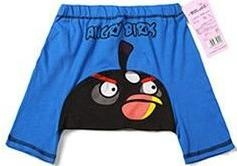

In [10]:
image_path = test_data_path.iloc[0]['image']
from IPython.display import Image, display
pil_img = Image(filename=image_path)
display(pil_img)

In [11]:
predictions = predictor.predict({'image': [image_path]})
print(predictions)

Predicting: |          | 0/? [00:00<?, ?it/s]

[2]


In [12]:
proba = predictor.predict_proba({'image': [image_path]})
print(proba)

Predicting: |          | 0/? [00:00<?, ?it/s]

[[0.24008915 0.24951349 0.27775952 0.23263782]]


In [13]:
image_byte = test_data_byte.iloc[0]['image']
predictions = predictor.predict({'image': [image_byte]})
print(predictions)

proba = predictor.predict_proba({'image': [image_byte]})
print(proba)

Predicting: |          | 0/? [00:00<?, ?it/s]

[2]


Predicting: |          | 0/? [00:00<?, ?it/s]

[[0.24008915 0.24951349 0.27775952 0.23263782]]


In [14]:
feature = predictor.extract_embedding({'image': [image_path]})
print(feature[0].shape)

Predicting: |          | 0/? [00:00<?, ?it/s]

(768,)


In [15]:
feature = predictor.extract_embedding({'image': [image_byte]})
print(feature[0].shape)

Predicting: |          | 0/? [00:00<?, ?it/s]

(768,)


In [18]:
import os
model_path = '/content/tmp/e90261b6f0ee459f8dc029823592b011-automm_shopee/' # Verify this path

# Check if the directory exists
if not os.path.isdir(model_path):
    print(f"Error: Directory '{model_path}' does not exist.")
else:
    # Check if checkpoint files exist
    if not os.path.isfile(os.path.join(model_path, 'last.ckpt')) or not os.path.isfile(os.path.join(model_path, 'model.ckpt')):
        print(f"Error: Checkpoint files not found in '{model_path}'. Ensure training was completed successfully.")
    else:
        loaded_predictor = MultiModalPredictor.load(model_path)
        load_proba = loaded_predictor.predict_proba({'image': [image_path]})
        print(load_proba)

Error: Directory '/content/tmp/e90261b6f0ee459f8dc029823592b011-automm_shopee/' does not exist.
